In [12]:
# -----------------------------------------------------
# 1. Import libraries
# -----------------------------------------------------
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# -----------------------------------------------------
# 2. Load the Iris dataset
# -----------------------------------------------------
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


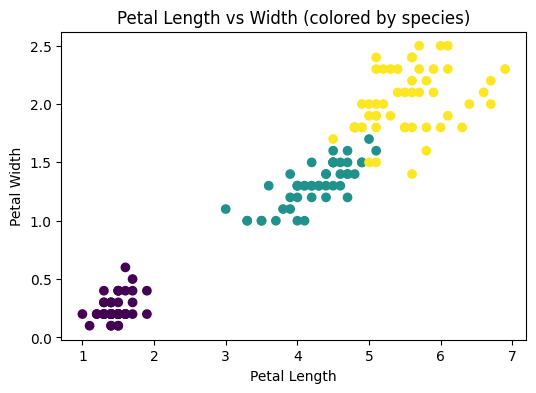

In [7]:
# -----------------------------------------------------
# 3. Visualize the data
# -----------------------------------------------------
plt.figure(figsize=(6, 4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['species'], cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width (colored by species)')
plt.show()

In [8]:
# -----------------------------------------------------
# 4. Prepare the data
# -----------------------------------------------------
x = df[iris.feature_names] # features
y = df['species'] # labels

In [9]:
# -----------------------------------------------------
# 5. Train-test split
# -----------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
# -----------------------------------------------------
# 6. Train Logistic Regression model
# -----------------------------------------------------
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [14]:
# -----------------------------------------------------
# 7. Make predictions
# ----------------------------------------------------- 
y_pred = model.predict(x_test)

In [15]:
# -----------------------------------------------------
# 8. Evaluate the model
# -----------------------------------------------------
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [28]:
# -----------------------------------------------------
# 9. Predict a new flower
# -----------------------------------------------------
# Example: sepal length, sepal width, petal length, petal width
# Create a new sample flower to predict
new_flower = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
)

# Predict the species
prediction = model.predict(new_flower)
print("\nPredicted Species:", iris.target_names[prediction[0]])



Predicted Species: setosa
